In [1]:
from elec_bol20 import *
import elec_bol20.util as ebu

In [2]:
# no puedo abrir este clustering
path = '2019_final_comp_clustered_6.csv'
df = pd.read_csv(os.path.join(ebu.DATA_PATH1,'2019',path),encoding='ISO-8859-1')

In [102]:
df = ebu.open_combine_2019()
df = df[df['VV']>0]
df = df[df['BOL']==1]

In [103]:
l =  np.log10(df['DEN'])
df['L_DEN'] = l
df['L_DENn'] = l/l.median()
# df['BOL_I'] = df['BOL'].astype(int)*100


In [104]:
['ID_RECI', 'HAB', 'CC', 'MAS', 'PDC', 'VV', 'X', 'Y', 'PAIS', 'LAT',
       'LON', 'DEN', 'REC', 'MUN', 'BOL']
p = ['MAS','CC','PDC','21F','BL','NL']
pp = ['mas','cc','pdc','21f','bl','nl']
pn = ['masn','ccn','pdcn','21fn','bln','nln']

for _p, _pp, _pn in zip(p,pp,pn):
    df[_pp] = df[_p]/df['VV']
    df[_pn]=df[_pp]/df[_pp].median()

In [105]:
pnn = [*pn,'L_DENn']

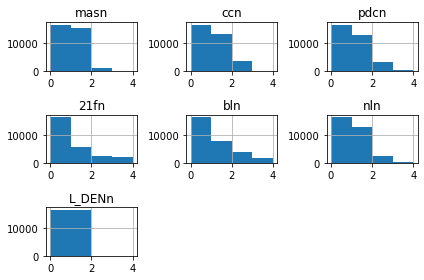

In [258]:
df[pnn].hist(bins=np.arange(0,5));
f = plt.gcf()
f.tight_layout()

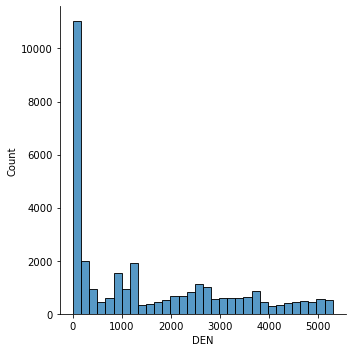

In [274]:
sns.displot(df['DEN'])

In [298]:
b = np.geomspace(5,10000,20)
b = b - b[0]

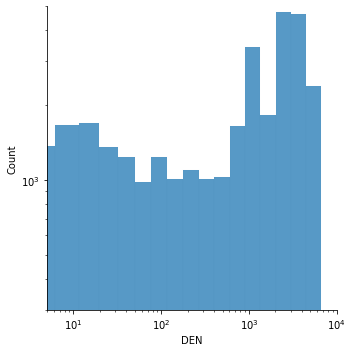

In [299]:
sns.displot(df['DEN'],bins=b)
plt.gca().set_xlim(5,10000)
plt.gca().set_ylim(300,5000)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

In [221]:
import sklearn.cluster

In [260]:
colors = ['b','r','g','orange','w','k','pink','yellow']
n=10
km = sklearn.cluster.KMeans(n_clusters=n,random_state=1234).fit(df[pp])
cen = pd.DataFrame(km.cluster_centers_,columns=pp)
cen.index.name='l'

In [261]:
_d = pd.DataFrame(km.labels_,columns=['l'])
_d['n'] = 1 
_d = _d.groupby('l').sum()

In [262]:
mer = pd.merge(cen,_d,left_index=True,right_index=True).sort_values('n',ascending=False)[cen.columns]

In [263]:
km = sklearn.cluster.KMeans(n_clusters=n,random_state=1234,init=mer).fit(df[pp])

/Users/diego/miniconda3/envs/ebol20/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [265]:
df['l']=km.labels_

(array([4512., 4473., 4466., 3678., 3624., 3531., 3103., 2860., 1928.,
         851.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <BarContainer object of 10 artists>)

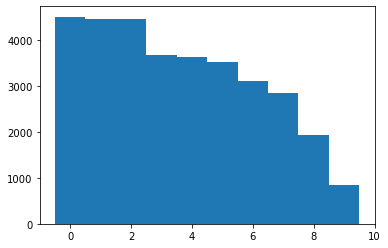

In [266]:
plt.hist(df['l'],bins=np.arange(-.5,n,1))

In [272]:
_c = [*pp,'L_DENn','l']
_df = pd.melt(df[_c],id_vars=['l'])

(-0.1, 1.5)

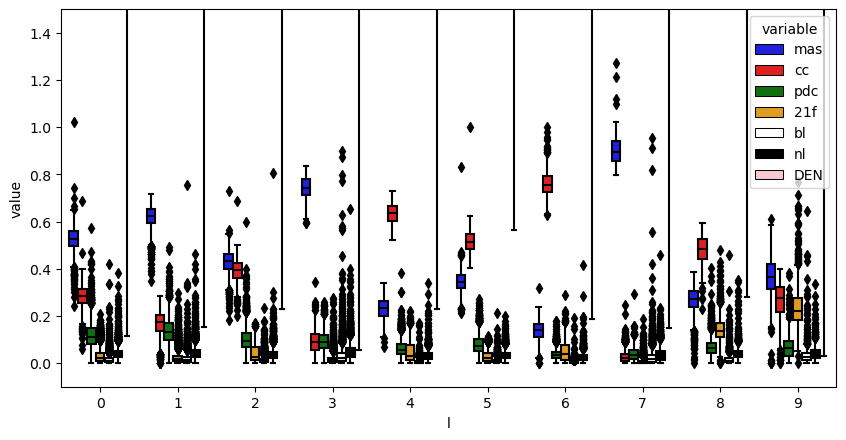

In [273]:
f,ax = plt.subplots(figsize=(10,5),dpi=100)
sns.boxplot(x='l',y='value',hue='variable',data=_df,palette=colors)
ax.set_ylim([-.1,1.5])

In [269]:
ll = len(df)
df['x'] = df['X']+np.random.rand(ll)*.3
df['y'] = df['Y']+np.random.rand(ll)*.3

In [270]:
col = bokeh.palettes.Category20[n][::-1]

In [271]:
bokeh.plotting.output_notebook()
cm = bokeh.transform.linear_cmap('l',palette=col,low=-.5,high=n-.5)
f = bokeh.plotting.figure(output_backend="webgl")
src = bokeh.models.ColumnDataSource(df[['x','y','l']])
cb = bokeh.models.ColorBar(
    color_mapper=cm['transform'], width=8,  location=(0,0)
)
f.scatter('x','y',source=src,color=cm,radius=.05)
f.add_layout(cb,'left')
bokeh.plotting.show(f)

Loading BokehJS ...

In [273]:
df[df['l']==4]['21F'].sum()

33117

In [268]:
df['21F'].sum()

260135